**Descripción**

# **Proyecto 2-Parte I (Core)**

## **Proyecto 2: Análisis Inicial y Selección de Problema**

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.


**1. Búsqueda de Conjuntos de Datos:**

Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

**About Dataset**


In [1]:
# Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = 'C:/Users/damav/Desktop/Codingdojo/Proyecto_2/datasets/DataSet2.csv'
df = pd.read_csv(path)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


## **1. Análisis Estadístico Descriptivo:**

* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.

* Analizar la distribución de las variables categóricas.

In [7]:
df.info

<bound method DataFrame.info of             ID  Gender  Age Customer Type Type of Travel         Class  \
0            1    Male   48    First-time       Business      Business   
1            2  Female   35     Returning       Business      Business   
2            3    Male   41     Returning       Business      Business   
3            4    Male   50     Returning       Business      Business   
4            5  Female   49     Returning       Business      Business   
...        ...     ...  ...           ...            ...           ...   
129875  129876    Male   28     Returning       Personal  Economy Plus   
129876  129877    Male   41     Returning       Personal  Economy Plus   
129877  129878    Male   42     Returning       Personal  Economy Plus   
129878  129879    Male   50     Returning       Personal  Economy Plus   
129879  129880  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                   

In [5]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


* Identificación de Valores Nulos y Outliers:

* Detectar valores nulos y discutir cómo podrían ser tratados.

* Identificar outliers y evaluar su impacto potencial en el análisis


In [6]:
# Verificamos los valores faltantes
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

# No hay valores nulos

,datos sin NAs en q,Na en q,Na en %
Arrival Delay,129487,393,0.3
ID,129880,0,0.0
Age,129880,0,0.0
Gender,129880,0,0.0
Type of Travel,129880,0,0.0
Class,129880,0,0.0
Flight Distance,129880,0,0.0
Customer Type,129880,0,0.0
Departure Delay,129880,0,0.0
Departure and Arrival Time Convenience,129880,0,0.0


In [8]:
# Manejo de valores faltantes
mean_arrival_delay = df['Arrival Delay'].mean()

df['Arrival Delay'].fillna(mean_arrival_delay, inplace=True)

C:\Users\damav\AppData\Local\Temp\ipykernel_24924\2851412812.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay'].fillna(mean_arrival_delay, inplace=True)


In [9]:
# Verificamos los valores faltantes
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
ID,129880,0,0.0
Gender,129880,0,0.0
Age,129880,0,0.0
Customer Type,129880,0,0.0
Type of Travel,129880,0,0.0
Class,129880,0,0.0
Flight Distance,129880,0,0.0
Departure Delay,129880,0,0.0
Arrival Delay,129880,0,0.0
Departure and Arrival Time Convenience,129880,0,0.0


In [ ]:
# Estadística descriptiva
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.407410,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


No podemos tomar como Outliers, los valores como Age, maximos de 85 son aceptables. Vemos Outliers Valores como Flight Distance varian segun el destino, asi tambien para Departure Delay y Arrival Delay. 

In [13]:
# Tipos de datos
df.dtypes

ID                                           int64
Gender                                    category
Age                                          int64
Customer Type                             category
Type of Travel                            category
Class                                     category
Flight Distance                              int64
Departure Delay                              int64
Arrival Delay                              float64
Departure and Arrival Time Convenience       int64
Ease of Online Booking                       int64
Check-in Service                             int64
Online Boarding                              int64
Gate Location                                int64
On-board Service                             int64
Seat Comfort                                 int64
Leg Room Service                             int64
Cleanliness                                  int64
Food and Drink                               int64
In-flight Service              

In [12]:
# Convertir las columnas a categoricas
categorical_cols = [
    'Gender', 'Customer Type', 'Type of Travel', 
    'Class', 'Satisfaction'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')

**3. Visualizaciones:**

* Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).

* Visualizar las correlaciones entre variables (mapa de calor de correlación).

Resumen de Hallazgos:
Resumir los principales hallazgos de cada EDA, destacando las características y desafíos únicos de cada conjunto de datos.

C:\Users\damav\AppData\Local\Temp\ipykernel_24924\605255134.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Satisfaction', data=df, palette='pastel')


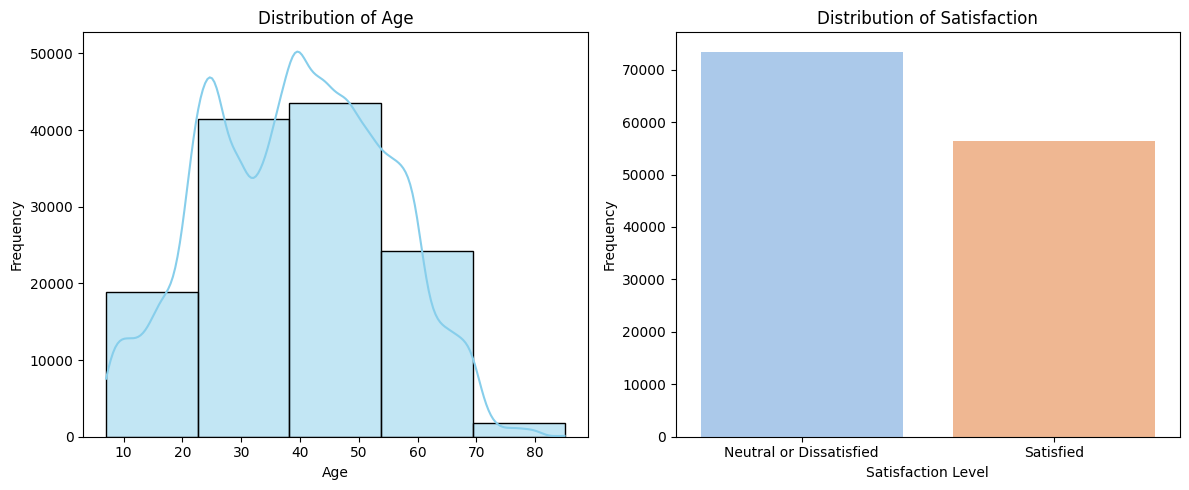

In [14]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

# Histogram for 'Age'
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Count plot for 'Satisfaction'
plt.subplot(1, 2, 2)
sns.countplot(x='Satisfaction', data=df, palette='pastel')
plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [17]:
# Get unique values in the 'Gender' column
unique_travel = df['Type of Travel'].unique()
print(unique_travel)

['Business', 'Personal']
Categories (2, object): ['Business', 'Personal']


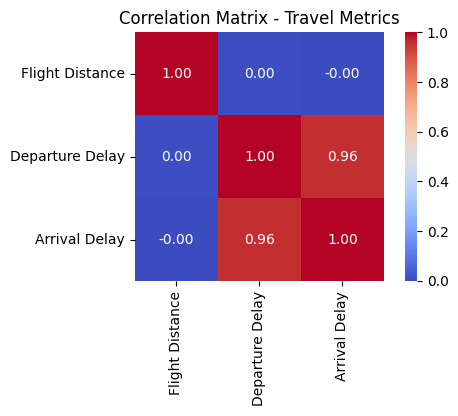

In [21]:
# Matrix 1: Travel-related metrica
travel_metrics = df[['Flight Distance', 'Departure Delay', 'Arrival Delay']]

# Calculate correlation matrix
correlation_travel = travel_metrics.corr()

# Heatmap
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_travel, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix - Travel Metrics')
plt.tight_layout()
plt.show()

Vemos gran correlacion ente Arrival Delat y Fligth Distance, as well as with Depature Delay.

# **Proyecto 2-Parte II (core)**

**Proyecto 2: Análisis y Selección de Problema**

**Parte II: Preprocesamiento y Optimización**

Objetivo: Realizar el preprocesamiento de datos y la optimización de modelos de machine learning para el conjunto de datos seleccionado. La meta es elegir la técnica de machine learning más adecuada y optimizar sus hiperparámetros para obtener el mejor rendimiento posible.

**1. Limpieza de Datos: Completada**

Tratar los valores nulos utilizando técnicas adecuadas (imputación, eliminación, etc.).

Manejar los outliers mediante técnicas de filtrado o transformación.


## **Transformación de Columnas:**

* **Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.**

* **Realizar codificación de variables categóricas utilizando técnicas como One-Hot Encoding.**

* **Escalar las variables numéricas usando StandardScaler u otros métodos de normalización.**

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


ModuleNotFoundError: No module named 'sklearn'

In [ ]:

# Step 1: Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
data = pd.read_csv('your_dataset.csv')

# Step 2: Identify categorical and numerical columns
categorical_cols = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
    'Satisfaction'
]
numerical_cols = [
    'Age',
    'Flight Distance',
    'Departure Delay',
    'Arrival Delay',
    'Departure and Arrival Time Convenience',
    'Ease of Online Booking',
    'Check-in Service',
    'Online Boarding',
    'Gate Location',
    'On-board Service',
    'Seat Comfort',
    'Leg Room Service',
    'Cleanliness',
    'Food and Drink',
    'In-flight Service',
    'In-flight Wifi Service',
    'In-flight Entertainment',
    'Baggage Handling'
]

# Step 3: Create the ColumnTransformer
# Apply One-Hot Encoding to categorical columns and StandardScaler to numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Step 4: Create a pipeline (optional, but useful for model fitting)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Step 5: Fit and transform the data
X_transformed = pipeline.fit_transform(data)

# Step 6: Convert the transformed data back to a DataFrame (optional)
# Get the column names after One-Hot Encoding
ohe_cols = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + list(ohe_cols)

# Create a DataFrame with transformed data
transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

# Optionally, inspect the transformed DataFrame
print(transformed_df.head())